## Imports

In [10]:
import PIL.Image
from PIL.ImageColor import colormap
# Torch Imports
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset

import torch

# Dataset Related
import kagglehub

# Plots and numpy
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
np.random.seed(42)

import os


#Utils
from utils.plot import  plot_classes, plot_random_six_images

# Dataset
In this repo I will use *Stanford Dogs Dataset* from kaggle
https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset

Originally from http://vision.stanford.edu/aditya86/ImageNetDogs/


## Getting Data

In [2]:
# Download latest version
DATA_PATH = kagglehub.dataset_download("jessicali9530/stanford-dogs-dataset")
IMG_PATH = os.path.join(DATA_PATH, "images", "Images")
ANNOTATION_PATH = os.path.join(DATA_PATH, "annotations", "Annotations")

print("Path to dataset files:", DATA_PATH)

Path to dataset files: /home/franio/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2


In [3]:
dataset = datasets.ImageFolder(root=IMG_PATH)

## Transforms

Normalization is done with standard image net $\mu$ and $\sigma$

In [4]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


train_transform = transforms.Compose([transforms.Resize((224,224)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean, std)])

test_transform = transforms.Compose([transforms.Resize((224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean, std)])

val_transform = transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)])

## Train, Val and Test Split
I will use 0.7/0.2/0.1 split
%TODO: I assume that 10k images in total is enough for fine tuning. I will reconsider this value after testing a model. -> with torch split random

In [5]:
N = len(dataset)

train_size = int(np.ceil(0.7*N))
val_size = int(np.ceil(0.2*N))
test_size = int(N - train_size - val_size)


training_set, testing_set, validation_set = torch.utils.data.random_split(dataset, [train_size, test_size, val_size])

print(f'Training set size:\t\t{len(training_set)}\n'
      f'Testing set size:\t\t{len(testing_set)}\n'
      f'Validation set size:\t{len(validation_set)}\n')

Training set size:		14406
Testing set size:		2058
Validation set size:	4116



## Data vizualzation

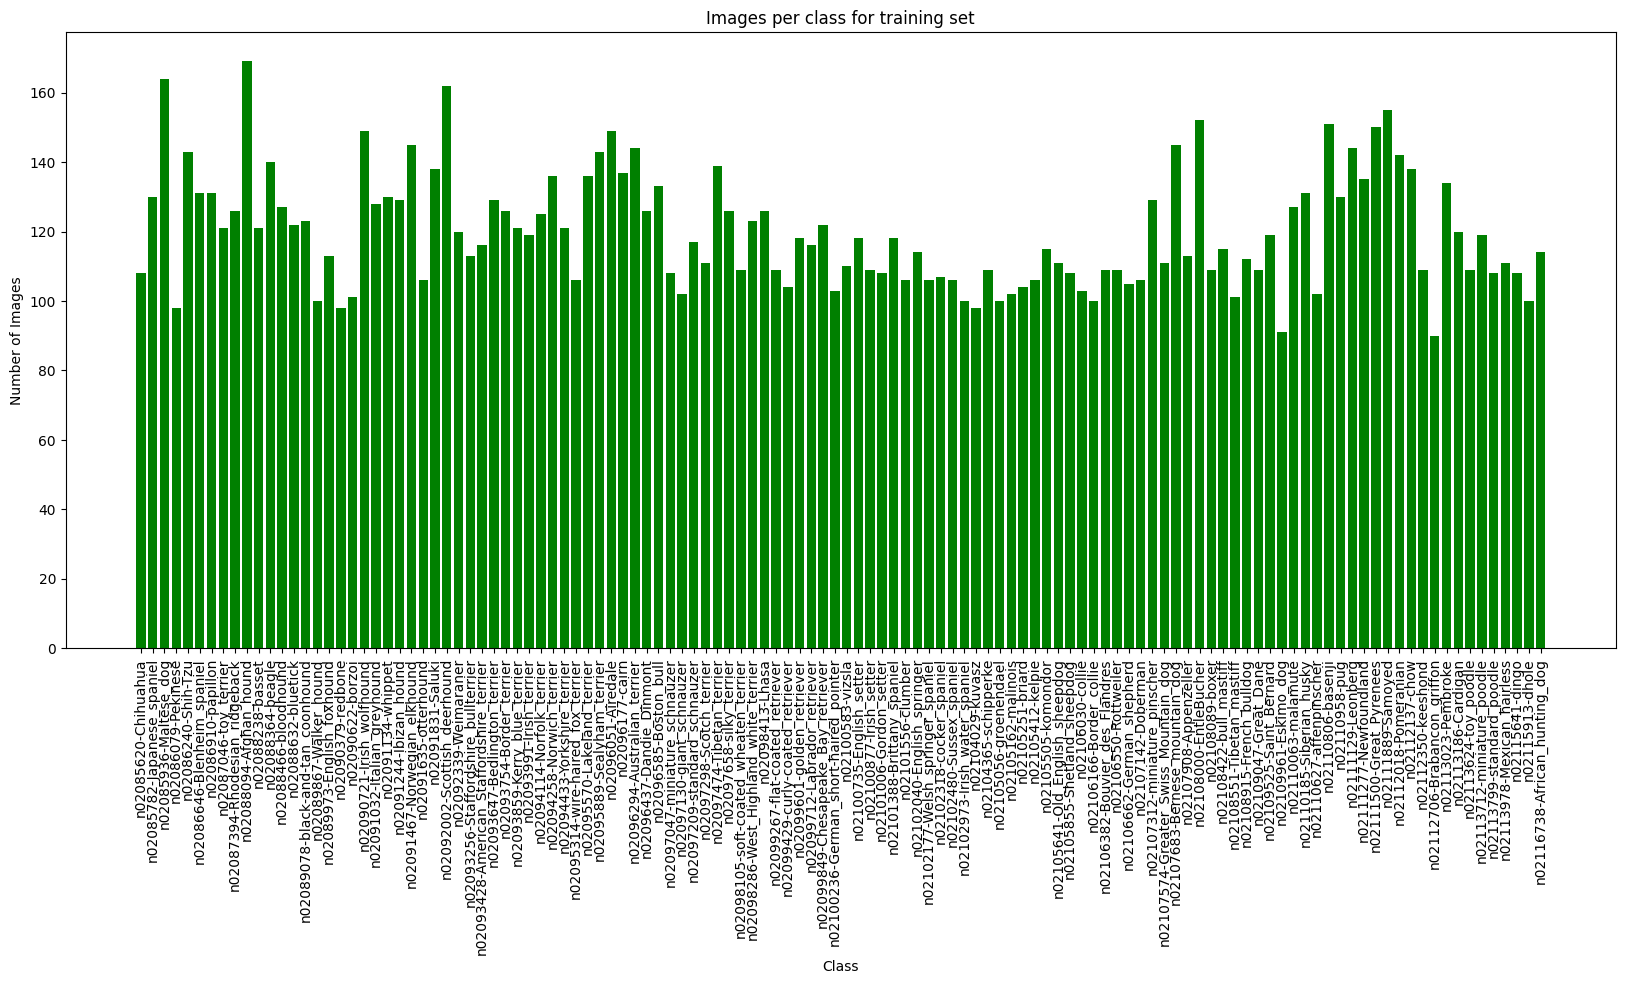

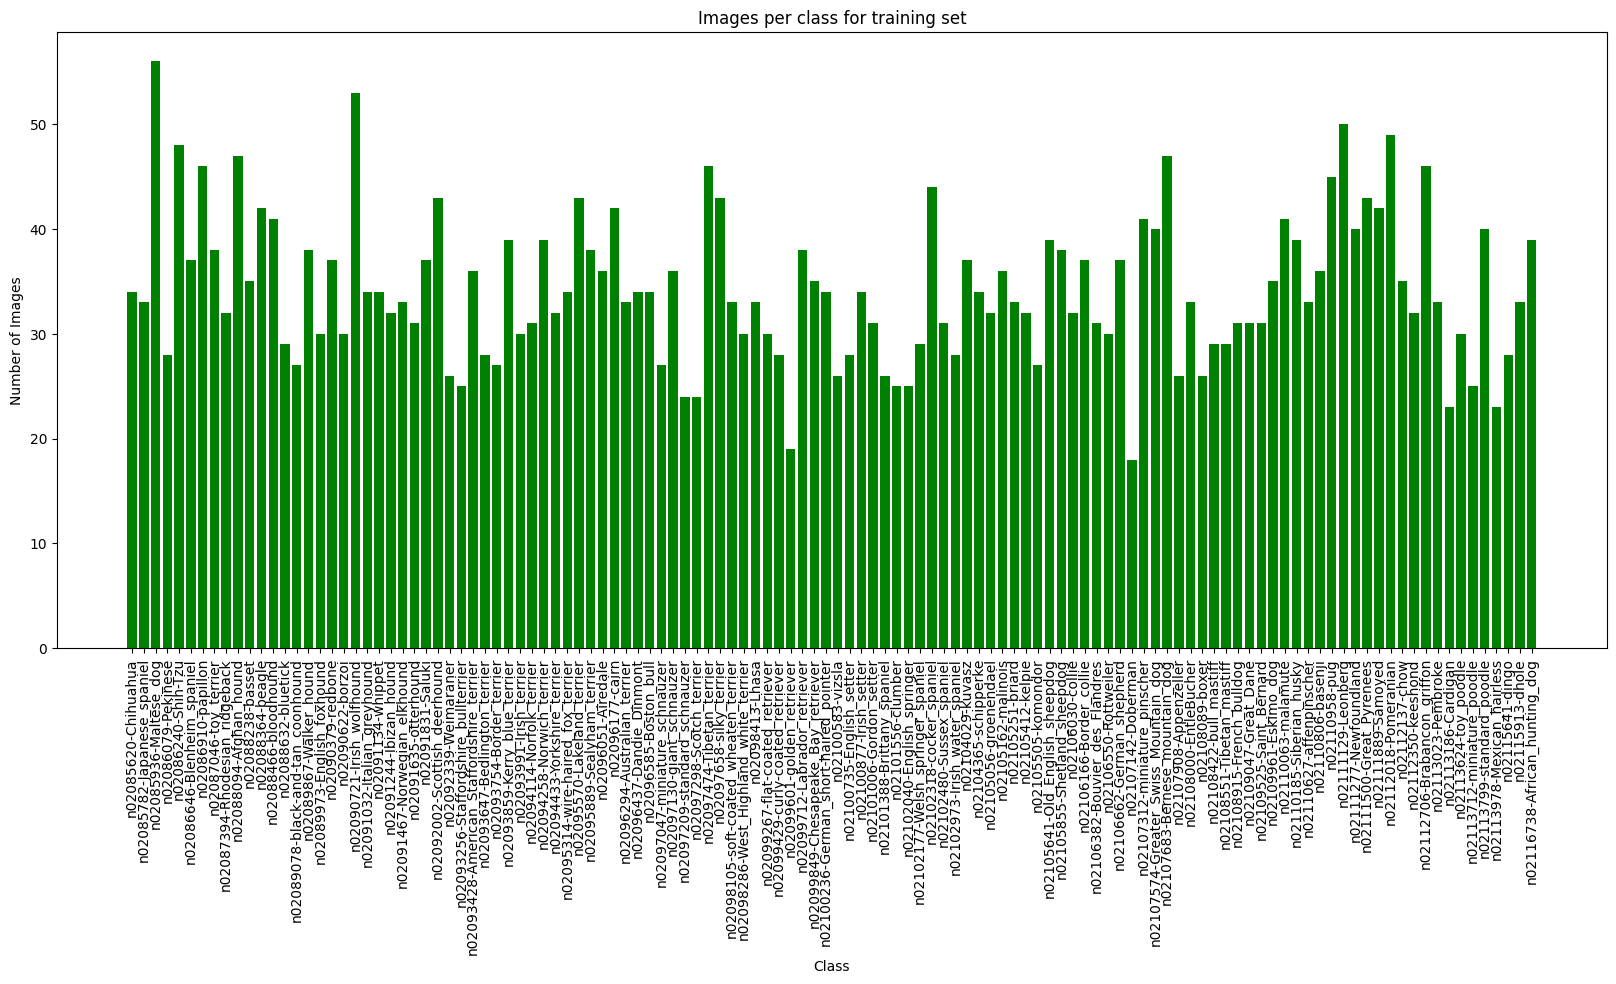

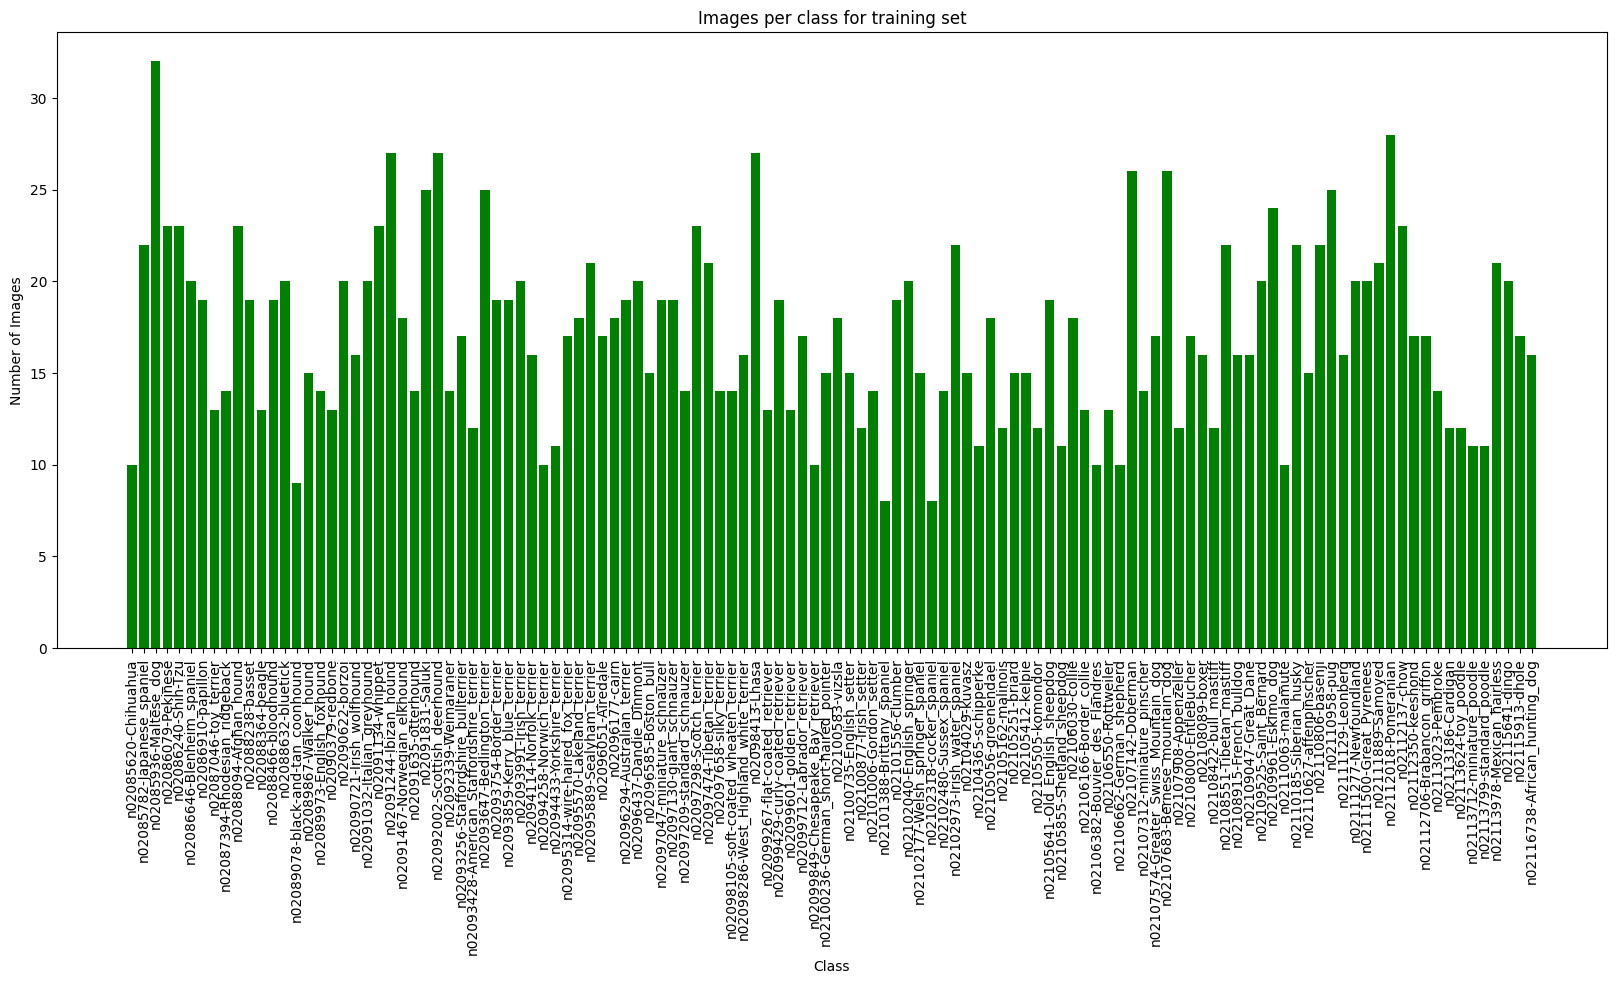

In [6]:
plot_classes(training_set, dataset.classes, set_name="training")
plot_classes(validation_set, dataset.classes, set_name="training")
plot_classes(testing_set, dataset.classes, set_name="training")

## Image Vizualization

[  169  3350 15800  9810 15457 19503]


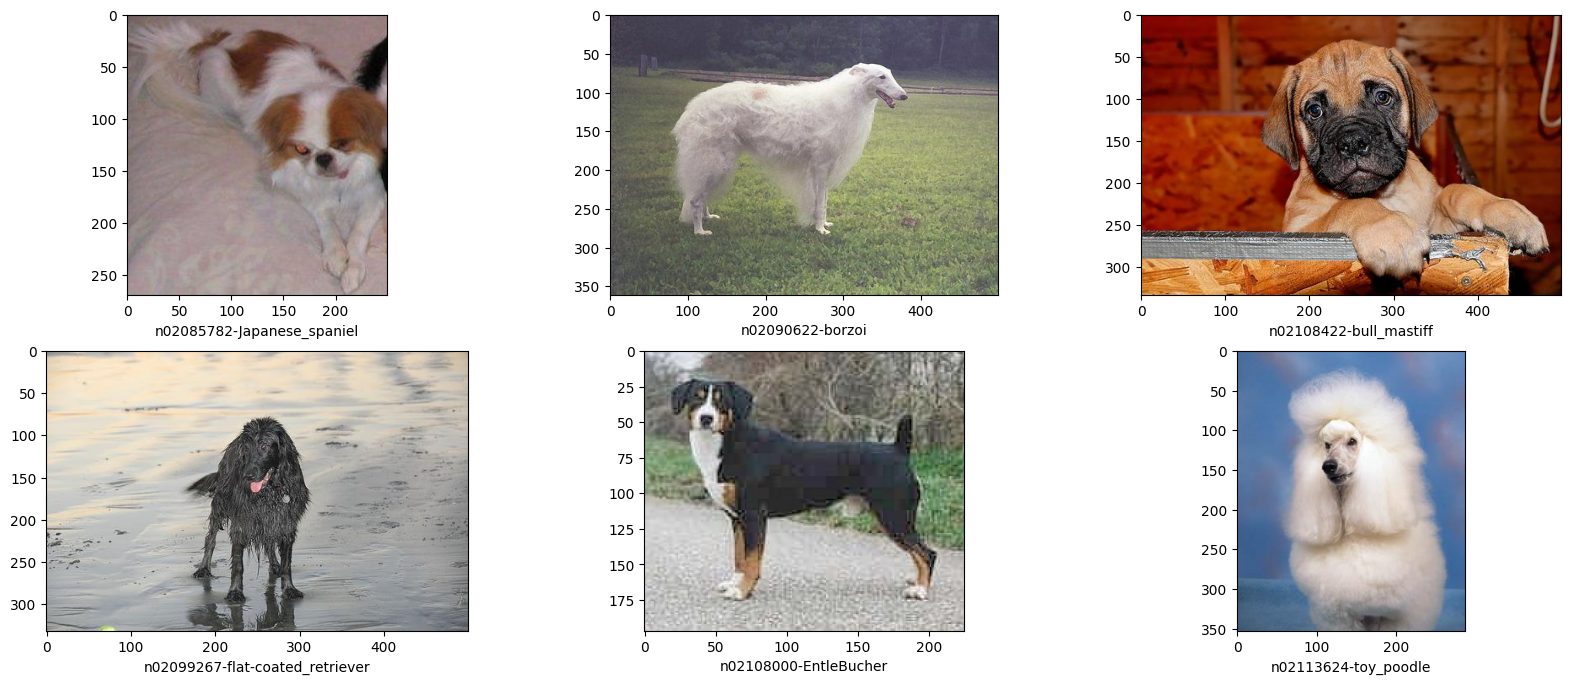

In [12]:
photos = datasets.ImageFolder(root=IMG_PATH)
plot_random_six_images(photos, photos.classes)